In [ ]:
#|default_exp app

In [ ]:
!pip install -Uqq fastai gradio -q

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

def extract_emotion(file_name: str) -> str:
    """
    Given the name of the file, return the label
    indicating the emotion associated with the audio.
    """
    # Split the filename at each underscore
    parts = file_name.split('_')
    # Label is after second
    label_with_extension = parts[-1]
    # Remove the extension to get only the label
    label = label_with_extension[:-4]
    return label

def get_y(filepath): return extract_emotion(str(filepath).split("/")[-1])

In [ ]:
# Testing with a sample audio
test_audio_path = "sample_file.wav"
import IPython
IPython.display.Audio(test_audio_path)

In [ ]:
!pip install librosa -q

### Preprocess the user input: Turn audio into images

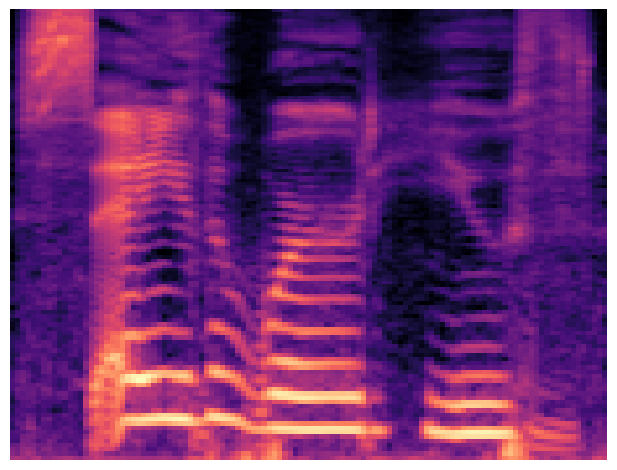

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

sample, sample_rate = librosa.load(test_audio_path, sr=None)
# Create Mel Spectogram
S = librosa.feature.melspectrogram(y=sample, sr=sample_rate)
S_DB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots()
fig.tight_layout(pad=0)
img = librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time',
                                 y_axis='mel', ax=ax)
plt.axis('off')
# Turn off the axis for saving
plt.savefig("sample_img.png")


In [ ]:
#|export
learn = load_learner("emotion_model.pkl")

In [ ]:
from pathlib import Path
test_img_path = Path("sample_img.png")
%time learn.predict(test_img_path)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


CPU times: user 562 ms, sys: 84.4 ms, total: 646 ms
Wall time: 719 ms


('fear',
 tensor(2),
 tensor([6.3967e-04, 8.4842e-04, 9.3015e-01, 4.7732e-02, 3.8662e-04, 1.4185e-02,
         6.0634e-03]))

In [ ]:
#|export
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pathlib import Path
import os

categories = learn.dls.vocab
def classify_audio(audio_file):
  """
  Takes the audio file and returns its
  prediction of emotions along with probabilities.
  """
  # Load the audio file
  sample, sample_rate = librosa.load(audio_file, sr=None, duration=20)
  # Create spectogram
  S = librosa.feature.melspectrogram(y=sample, sr=sample_rate)
  S_DB = librosa.power_to_db(S, ref=np.max)
  # Prepare the figure for saving the spectrogram
  fig, ax = plt.subplots()
  fig.tight_layout(pad=0)
  # Create the spectogram image
  img = librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time',
                                 y_axis='mel', ax=ax)
  # Turn off the axis for saving
  plt.axis('off')
  # Save the spectogram temporarily
  temp_img_path = Path("temp_spectogram.png")
  plt.savefig(temp_img_path)
  plt.show()

  pred,idx, probs = learn.predict(temp_img_path)

  # Remove the temporary spectogram image
  os.remove(temp_img_path)

  return dict(zip(categories, map(float, probs)))

In [ ]:
#|export
audio = gr.Audio(type="filepath", label="Upload Audio <=20 seconds")
label = gr.Label()
# Gradio Interface
inf = gr.Interface(fn=classify_audio, inputs=audio, outputs=label)
inf.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f3a537c818487d416d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://f3a537c818487d416d.gradio.live


### Turning notebook to Python script with nbdev

In [ ]:
!pip install nbdev --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
import nbdev
notebook_path = "/content/drive/MyDrive/Machine Learning Work/Emotion Recognition with CNN/Audio Emotion Recognition Inference.ipynb"
nbdev.export.nb_export(notebook_path, './')